# STA 208: Homework 2 (Do not distribute)

## Due 05/12/2023 midnight (11:59pm)

__Instructions:__ 

1. Submit your homework using one file name ”LastName_FirstName_hw2.html” on canvas. 
2. The written portions can be either done in markdown and TeX in new cells or written by hand and scanned. Using TeX is strongly preferred. However, if you have scanned solutions for handwriting, you can submit a zip file. Please make sure your handwriting is clear and readable and your scanned files are displayed properly in your jupyter notebook. 
3. Your code should be readable; writing a piece of code should be compared to writing a page of a book. Adopt the one-statement-per-line rule. Consider splitting a lengthy statement into multiple lines to improve readability. (You will lose one point for each line that does not follow the one-statementper-line rule)
4. To help understand and maintain code, you should always add comments to explain your code. (homework with no comments will receive 0 points). For a very long comment, please break it into multiple lines.
5. In your Jupyter Notebook, put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text.
6. Please make sure to print out the necessary results to avoid losing points. We should not run your code to figure out your answers. 
7. However, also make sure we are able to open this notebook and run everything here by running the cells in sequence; in case that the TA wants to check the details.
8. You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions


### Exercise 1 (Logistic regression)

(15 points) In class, we studied the logit model with 2 classes. Now consider the multilogit model with $K$ classes. Let $\beta$ be the $(p+1)(K-1)$-vector consisting of all the coefficients. Define a suitably enlarged version of the input vector x to accomodate this vectorized coefficient matrix. Derive the Newton-Raphson algorithm for maximizing the multinomial log-likelihood, and describe how you implement the algorithm (e.g., you can write a sudo code). 

**Treating $\beta$ as a long vector directly might not be efficient in both calculation and reasoning process. Here, I treat $\beta$ as a matrix before the process of taking so-called second order partial derivative. When taking so-called partial derivatives, simply apply matrix vectorization to make them work.**



The multilogit model with $K$ classes is a generalization of the binary logistic regression model. Instead of modeling the probability of a binary outcome, it models the probability of a categorical outcome with $K$ possible classes. Let $Y$ be a categorical random variable taking values in $\{1, 2, \dots, K\}$, and let $X$ be a $p$-dimensional vector of predictors. The multilogit model assumes that the log-odds of $Y$ taking on value $k$ versus a reference category are linear functions of the predictors:
$$
\log\left(\frac{P(Y=k|X)}{P(Y=K|X)}\right) = \beta_{0k} +  X_1\beta_{1k} + \cdots +  X_p\beta_{pk}, \quad k=1,2,\dots,K-1,
$$
where $\beta_{jk}$ is the coefficient for the $j$-th predictor and the $k$-th class, and $\beta_{0k}$ is the intercept for the $k$-th class. Note that the coefficient **matrix** $\beta$ has dimension $(p+1) \times (K-1)$, because there is no need to estimate the coefficients for the reference category.

Let us compress this expression and apply this formula to all $n$ $(Y,X)$ pairs:

$$
\log \left( \frac{P_{i,k}}{P_{i,K}}\right) = X_{i,\cdot}\beta_{\cdot,k}=(X\beta)_{i,k}, \quad  \forall k\in\{K-1\}\triangleq \{1,2,\cdots,K-1\},\quad \forall i\in\{n\}
$$

where 
$\beta_{\cdot,k}\triangleq
\begin{pmatrix}
\beta_{0k} \\ \beta_{1k} \\ \cdots \\ \beta_{pk}
\end{pmatrix}$, 
$X\triangleq\begin{pmatrix}
1 & X_{11} & \cdots & X_{1p}\\
1 & X_{21} & \cdots & X_{2p}\\
\vdots & \vdots & \ddots & \vdots\\
1 & X_{n1} & \cdots & X_{np}\\
\end{pmatrix}$,
$P_{i,k}\triangleq P(Y=k|X_{i,\cdot})$.

Notice that 
$$
\begin{align}
&P_{i,k} =P_{i,K}\exp\left( (X\beta)_{i,k} \right), \forall k\in\{K-1\}, \forall i
\\\Rightarrow& \sum_{i=1}^{K} P_{i,k}=P_{i,K}\left[ 1 + \sum_{k=1}^{K-1}\exp\left( (X\beta)_{i,k} \right)\right]=1, \forall i
\\\Rightarrow& P_{i,K}=\left[ 1 + \sum_{k=1}^{K-1}\exp\left( (X\beta)_{i,k}\right) \right]^{-1}, \forall i.
\end{align}
$$

To derive the Newton-Raphson algorithm for maximizing the multinomial log-likelihood, we start by writing the likelihood function for a single observation $(X_i, Y_i)$:
$$
L_i(\beta) = \prod_{k=1}^{K} \left(P(Y_i=k|X_i)\right)^{I(Y_i=k)}=\prod_{k=1}^{K}\left(P_{i,k}\right)^{I(Y_i=k)},
$$
where $I(Y_i=k)$ is the indicator function that takes value 1 if $Y_i=k$ and 0 otherwise. Taking the logarithm and summing over all observations, we get the log-likelihood function for the entire sample:

\begin{align}
\ell(\beta) =& \sum_{i=1}^{n} \sum_{k=1}^{K} I(Y_i=k) \log(P(Y_i=k|X_i)) 
\\=& \sum_{i=1}^{n} \sum_{k=1}^{K-1} I(Y_i=k) 
\left[\beta_{0k} +  X_{i1} \beta_{1k}+ \cdots +  X_{ip} \beta_{pk}
- \log
\left(1+\sum_{j=1}^{K-1}\exp(\beta_{0j} +  X_{i1}\beta_{1j} + \cdots +  X_{ip}\beta_{pj})
\right)
\right]
\\&+
\sum_{i=1}^n I(Y_i=K)\left[-\log\left(1 + \sum_{j=1}^{K-1}\exp(\beta_{0j} + X_{i1}\beta_{1j} + \cdots +  X_{ip}\beta_{pj} ) \right)\right]
\\=&
\sum_{i=1}^n \sum_{k=1}^{K-1} I(Y_i = k) (X\beta)_{i,k}
+ \sum_{i=1}^n -\log \left( 1 + \sum_{j=1}^{K-1} \exp\left(  (X\beta)_{i,j} \right) \right) \sum_{k=1}^{K} I(Y_i=k)
\\=&
\sum_{i=1}^n \sum_{k=1}^{K-1} I(Y_i = k) (X\beta)_{i,k}
+ \sum_{i=1}^n -\log \left( 1 + \sum_{j=1}^{K-1} \exp\left(  (X\beta)_{i,j} \right) \right) 
\end{align}

The goal is to find the values of $\beta$ that maximize this function.

To apply the Newton-Raphson algorithm, we need to compute the first and second derivatives of the log-likelihood function with respect to $\beta$. 

The first derivative of the log-likelihood function with respect to $\beta_{jq}$ is

$$
\begin{align}
\frac{\partial \ell(\beta)}{\partial \beta_{jq}} 
=& \sum_{i=1}^n I(Y_i=q) X_{ij} + \sum_{i=1}^n \frac{-\exp \left( (X\beta)_{i,q} \right)}{1+\sum_{t=1}^{K-1}\exp\left((X\beta)_{i,t}\right)} X_{ij}
\\=&
\sum_{i=1}^n X_{ij} \left[I(Y_i=q) - P_{i,q}\right] = \left(X'\right)_{j,\cdot}\left[I(Y=q)-P_{\cdot,q}\right]
=\left(X'\left[I_Y-P_{\cdot,\cdot}\right]\right)_{j,q}\ \ ,
\end{align}
$$

where $I(Y=q)\triangleq \begin{pmatrix} I(Y_1=q)\\ I(Y_2=q) \\ \vdots \\ I(Y_n=q)\end{pmatrix}$, 
$I_Y\triangleq 
\begin{pmatrix} 
    I(Y_1=1) & I(Y_1=2) & \cdots & I(Y_1=K-1)\\
    I(Y_2=1) & I(Y_2=2) & \cdots & I(Y_2=K-1)\\
    \vdots & \vdots & \ddots & \vdots\\
    I(Y_n=1) & I(Y_n=2) & \cdots & I(Y_n=K-1)\\
\end{pmatrix}$, 
$\forall j=0,1,\cdots,p,\forall q\in\{K-1\}$

The vectorization of a matrix, i.e. vec$(\cdot)$, is defined as 
$$
\text{vec}(A)\triangleq
\begin{pmatrix}
A_{\cdot,1}\\
A_{\cdot,2}\\
\vdots\\
A_{\cdot,mn}\\
\end{pmatrix},\ 
\forall A\in\mathbf{R}^{m\times n},\ \forall m,n\in \mathbf{Z}_{++}.
$$

So
$$
\frac{\partial \ell(\beta)}{\partial \beta} 
=\left(X'\left[I_Y-P_{\cdot,\cdot}\right]\right)
\Rightarrow 
\frac{\partial \ell(\beta)}{\partial \text{vec}(\beta)}
=\text{vec}\left(X'\left[I_Y-P_{\cdot,\cdot}\right]\right) 
$$

Therefore,
$$
\begin{align}
\frac{\partial}{\partial \beta_{\tilde j \tilde q}}\left( \frac{\partial \ell(\beta)}{\partial \beta} \right) 
=& \frac{\partial}{\partial \beta_{\tilde j \tilde q}}\left(X'\left[I_Y-P_{\cdot,\cdot}\right]\right)
=\frac{\partial}{\partial \beta_{\tilde j \tilde q}}\left(-X'P_{\cdot,\cdot}\right)
\\=&
-X'\frac{\partial}{\partial \beta_{\tilde j \tilde q}}\left(P_{\cdot,\cdot}\right)
\end{align}
$$

where $\left[ \frac{\partial}{\partial \beta_{\tilde j \tilde q}}\left(P_{\cdot,\cdot}\right) \right]_{i,q}=P_{i,q}X_{i,\tilde j}[I(q=\tilde q)-P_{i,\tilde q}]\ \forall i,q$.

So 
$$
\begin{align}
\frac{\partial^2}{\partial \text{vec}(\beta)\partial \text{vec}(\beta)' }\ell(\beta)
=&
\frac{\partial\left(\frac{\ell (\beta)}{\partial \text{vec}(\beta)}\right)}{\partial \text{vec}(\beta)'}
\\=&
\frac{\partial\left(\text{vec}\left(\frac{\ell (\beta)}{\partial \beta}\right)\right)}{\partial \text{vec}(\beta)'}
\\=&
\frac{\partial\left(\text{vec}\left( X'[I_Y-P_{\cdot,\cdot}]\right)\right)}{\partial \text{vec}(\beta)'}
\\=&
\begin{pmatrix}
\frac{\partial}{\partial \text{vec}(\beta)_1}&\frac{\partial}{\partial \text{vec}(\beta)_2}&\cdots&\frac{\partial}{\partial \text{vec}(\beta)_{[(p+1)\times(K-1)]}}\quad
\end{pmatrix}
\text{vec}\left( X'[I_Y-P_{\cdot,\cdot}]\right)
\\=&
\begin{pmatrix}
\frac{\text{vec}\ \partial}{\partial \text{vec}(\beta)_1} & 
\frac{\text{vec}\ \partial}{\partial \text{vec}(\beta)_2} & 
\cdots &
\frac{\text{vec}\ \partial}{\partial \text{vec}(\beta)_{[(p+1)(K-1)]}}\quad
\end{pmatrix}
\left( X'[I_Y-P_{\cdot,\cdot}]\right)
\\=&
\begin{pmatrix}
\frac{\text{vec}\ \partial}{\partial \text{vec}(\beta)_1} & 
\frac{\text{vec}\ \partial}{\partial \text{vec}(\beta)_2} & 
\cdots &
\frac{\text{vec}\ \partial}{\partial \text{vec}(\beta)_{[(p+1)(K-1)]}}\quad
\end{pmatrix}
\left( -X'P_{\cdot,\cdot}\right)
\\=&
\begin{pmatrix}
\frac{\text{vec}\ (X'\partial)}{\partial \text{vec}(\beta)_1} & 
\frac{\text{vec}\ (X'\partial)}{\partial \text{vec}(\beta)_2} & 
\cdots &
\frac{\text{vec}\ (X'\partial)}{\partial \text{vec}(\beta)_{[(p+1)(K-1)]}}\quad
\end{pmatrix}
\left( -P_{\cdot,\cdot}\right)
\end{align}
$$

With the knowledge that $\left[ \frac{\partial}{\partial \beta_{\tilde j \tilde q}}\left(P_{\cdot,\cdot}\right) \right]_{i,q}=P_{i,q}X_{i,\tilde j}[I(q=\tilde q)-P_{i,\tilde q}]\ \forall i,q$, I can solve the above problem according to the specific reordering rule of vec$(\cdot)$.

To find out the best fit $\beta$, I need to solve this problem:
$$\frac{\partial \ell (\beta)}{\partial \text{vec}(\beta)}=0$$

According to the Newton's algorithm, I need to iterate $n_{\text{iter}}=1,2,\cdots,n_{\text{max}}$ with $\beta^{(0)}$, an initial guess of $\beta$, and a step size $s$,
$$
\text{vec}\left(\beta^{(n_{\text{iter}}\ )}\right) = \text{vec}\left(\beta^{(n_{\text{iter}}\ -1)}\right) + s\left[\Big(-\frac{\partial^2}{\partial \text{vec}(\beta)\partial \text{vec}(\beta)' }\ell(\beta)\Big)^{-1} \frac{\partial \ell (\beta)}{\partial \text{vec}(\beta)}\right]\bigg|_{\beta=\beta^{\left(n_{\ \text{iter}}\ \ -1\right)}}\ \ .
$$

The vec$(\cdot)$ function systematically reorders a sequence of numbers without changing or omitting any information about their values. Consequently, it is evident that this function is invertible, although the form of the inverse function vec$(\cdot)^{-1}$ may not be immediately apparent. In other words, obtaining vec$(\beta^{(n_{\text{iter}}\ )})$ is equivalent to obtaining $\beta^{(n_{\text{iter}}\ )}$ and vice versa.

Just select a random initial guess $\beta^{(0)}$ and a reasonable step size $s$ to start the above iterating process, then I can get an approximation of the best $\beta$ to this question.

### Exercise 2 (Support vector machine)

_Natural language processing_ (NLP) is a branch of artificial intelligence which gives computers the ability to learn text and spoken words in much the same way human beings can.

In python, text data can be converted into vector data through a vectorization operation.
Two vectorizer packages in Python are ``sklearn.feature_extraction.text.CountVectorizer`` and ``sklearn.feature_extraction.text.TfidfVectorizer``. A corpus is a collection of documents and the dictionary is all of the words in the corpus. A simple vectorizer will let $X_{i,j}$ be the number of times the $j$th word is in the $i$th document. 

Bag-of-words models is one of the most popular model in NLP. The model treats each document as a set of words but ignoring the order of those words. 

In this exercise, you will learn how to classify a text using SVM. The dataset includes two CSV files (`Corona_NLP_train.csv` and `Corona_NLP_test.csv`) that contain IDs and sentiment scores of the tweets related to the COVID-19 pandemic. The real-time Twitter feed is monitored for coronavirus-related tweets using 90+ different keywords and hashtags that are commonly used while referencing the pandemic. The oldest tweets in this dataset date back to October 01, 2019. 


The training dataset contains five columns: 
- UserName	
- ScreenName	
- Location	
- TweetAt	
- OriginalTweet	
- Sentiment (five labels: `extremely positive`, `positive`, `negative`, `extremely negative`, `neutral`)

The task is to predict sentiment basedon the original tweet. Here, we combine `extremely positive` and `positive` to `positive` and combine `extremely negative` and `negative` to `negative`. So, the sentiment contains three labels.
Your goal is to apply svm to predict the three labels based on OriginalTweet. Indeed, one can view this as a classification problem with three labels. 

I already attached the file `dataprocessing.ipynb` for processing the data. The code is directly copied from this [website](https://www.kaggle.com/code/mehmetlaudatekman/text-classification-svm-explained/notebook).

Please answer the following questions:
 
1. (15 points) Use sklearn svm.SVC on the TRAIN split (`Corona_NLP_train.csv`) and predict on the TEST split (`Corona_NLP_test.csv`). Plot your ROC and PR (Precision-Recall) curves for predicting `positive` (versus everything else); use the linear kernel and set the C parameter to be 1. Do the same for predicting the `negative` label versus everything else. Please write the code for generating the ROC curve by yourself.
2. (10 points) In this problem, we have three labels (instead of two). In class, we only learned SVM for solving a two-class classification problem. Describe (using your own words) how the python package `svm.SVC` fits SVM for multi-class classification.
3. (10 points) Choose several different values for $C$ (some are smaller than 1, some are bigger than 1), plot the ROC curves for predicting 'positive' (versus everything else), and predicting 'negative' (versus everything else). Comment on your findings. 
4. (Bonus 10 points) Explore how to use logistic regression to classify this text. Implement the method. Comment on its prediction accuracy and compare the ROC curve with the SVM ROC curve. 

__Note:__ the PR curve is a ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class.

**Ans 1.**

In [1]:
# import packages 
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import time
import re

In [2]:
# load training and test datasets

train_set = pd.read_csv('Corona_NLP_train.csv',encoding="latin1") # do not forget to change the path
test_set = pd.read_csv('Corona_NLP_test.csv',encoding="latin1")

In [3]:
# remove unrelevant_features

unrelevant_features = ["UserName","ScreenName","Location","TweetAt"]
train_set.drop(unrelevant_features,inplace=True,axis=1)
test_set.drop(unrelevant_features,inplace=True,axis=1)
train_set.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
# split data based on sentiment values: positive, neutral or negative.
# Extremely positive is combined with positive. Similar to extremely negative
train_set["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [5]:
positives = train_set[(train_set["Sentiment"] == "Positive") | (train_set["Sentiment"] == "Extremely Positive")]
positives_test = test_set[(test_set["Sentiment"] == "Positive") | (test_set["Sentiment"] == "Extremely Positive")]
print(positives["Sentiment"].value_counts())
positives.head()

Positive              11422
Extremely Positive     6624
Name: Sentiment, dtype: int64


,OriginalTweet,Sentiment
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
5,As news of the regionÂs first confirmed COVID...,Positive
6,Cashier at grocery store was sharing his insig...,Positive


In [6]:
negatives = train_set[(train_set["Sentiment"] == "Negative") | (train_set["Sentiment"] == "Extremely Negative")]
negatives_test = test_set[(test_set["Sentiment"] == "Negative") | (test_set["Sentiment"] == "Extremely Negative")]
print(negatives["Sentiment"].value_counts())
negatives.head()

Negative              9917
Extremely Negative    5481
Name: Sentiment, dtype: int64


,OriginalTweet,Sentiment
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
9,"For corona prevention,we should stop to buy th...",Negative
20,with 100 nations inficted with covid 19 th...,Extremely Negative
24,@10DowningStreet @grantshapps what is being do...,Negative
26,In preparation for higher demand and a potenti...,Negative


In [7]:
neutrals = train_set[train_set["Sentiment"] == "Neutral"]
neutrals_test = test_set[test_set["Sentiment"] == "Neutral"]
print(neutrals["Sentiment"].value_counts())
neutrals.head()

Neutral    7713
Name: Sentiment, dtype: int64


,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
7,Was at the supermarket today. Didn't buy toile...,Neutral
10,All month there hasn't been crowding in the su...,Neutral
16,????? ????? ????? ????? ??\r\r\n?????? ????? ?...,Neutral
17,@eyeonthearctic 16MAR20 Russia consumer survei...,Neutral


In [2]:
import warnings as wrn

In [8]:
# Convert labels into integers 
# convert negatives as 0
# neutrals as 1 
# and positives as 2.

import warnings as wrn
wrn.filterwarnings('ignore')

negatives["Sentiment"] = 0 
negatives_test["Sentiment"] = 0

positives["Sentiment"] = 2
positives_test["Sentiment"] = 2

neutrals["Sentiment"] = 1
neutrals_test["Sentiment"] = 1

In [9]:
# concatenate train and test first, will split them after processing.

data = pd.concat([positives,
                  positives_test,
                  neutrals,
                  neutrals_test,
                  negatives,
                  negatives_test
                 ],axis=0)

data.reset_index(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44955 entries, 0 to 44954
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          44955 non-null  int64 
 1   OriginalTweet  44955 non-null  object
 2   Sentiment      44955 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
data.head()

,index,OriginalTweet,Sentiment
0,1,advice Talk to your neighbours family to excha...,2
1,2,Coronavirus Australia: Woolworths to give elde...,2
2,3,My food stock is not the only one which is emp...,2
3,5,As news of the regionÂs first confirmed COVID...,2
4,6,Cashier at grocery store was sharing his insig...,2


In [12]:
cleanedData = []
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
lemma = WordNetLemmatizer()
swords = stopwords.words("english")
for text in data["OriginalTweet"]:
    
    # Cleaning links
    text = re.sub(r'http\S+', '', text)
    
    # Cleaning everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    # Tokenizing and lemmatizing
    text = nltk.word_tokenize(text.lower())
    text = [lemma.lemmatize(word) for word in text]
    
    # Removing stopwords
    text = [word for word in text if word not in swords]
    
    # Joining
    text = " ".join(text)
    
    cleanedData.append(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wintersweet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wintersweet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wintersweet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wintersweet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [13]:
# check the output text

for i in range(0,5):
    print(cleanedData[i],end="\n\n")

advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order

coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid 19 outbreak

food stock one empty please panic enough food everyone take need stay calm stay safe covid19france covid 19 covid19 coronavirus confinement confinementotal confinementgeneral

news region first confirmed covid 19 case came sullivan county last week people flocked area store purchase cleaning supply hand sanitizer food toilet paper good tim dodson report

cashier grocery store wa sharing insight covid 19 prove credibility commented civics class know talking



In [14]:
# create the bag of words

vectorizer = CountVectorizer(max_features=10000)
BOW = vectorizer.fit_transform(cleanedData)

In [3]:
from sklearn.model_selection import train_test_split

In [15]:
# split the dataset into training and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(BOW,np.asarray(data["Sentiment"]))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33716, 10000)
(11239, 10000)
(33716,)
(11239,)


In [17]:
# #importing libraries 
# from sklearn import svm, metrics
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, precision_recall_curve
# import matplotlib.pyplot as plt 
# from matplotlib import cm
# import numpy as np
# from sklearn.preprocessing import label_binarize
# from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
# plt.style.use('ggplot')

# y_train_binarized = label_binarize(y_train, classes = [0,1,2])
# y_test_binarized = label_binarize(y_test, classes = [0,1,2])

In [19]:
# #using SVC with linear kernel and one vs rest for predicting probabilities. OneVsRest converts labels to use for plotting
# multiclass = OneVsRestClassifier(svm.SVC(C = 1, kernel = 'linear', decision_function_shape= 'ovr'))

# #fitting model
# multiclass.fit(x_train[:, :], y_train_binarized[:])

OneVsRestClassifier(estimator=SVC(C=1, kernel='linear'))

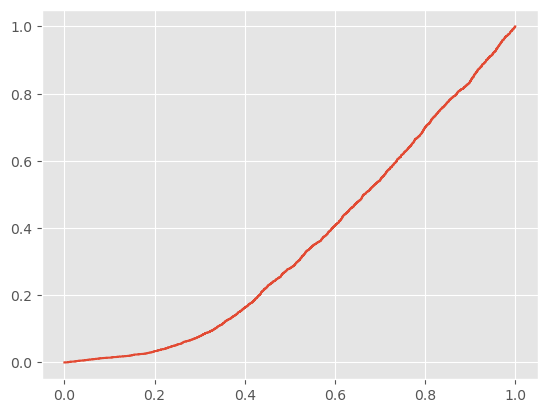

In [21]:
# y_test_pos = (y_test == 2).astype(int)
# y_prob_pos = multiclass.decision_function(x_test)[:, 1]

# fpr_pos, tpr_pos, _ = roc_curve(y_test_pos, y_prob_pos)
# roc_auc_pos = auc(fpr_pos, tpr_pos)
# plt.plot(fpr_pos, tpr_pos, label='ROC Curve (area = %0.2f)' % roc_auc_pos)

In [4]:
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

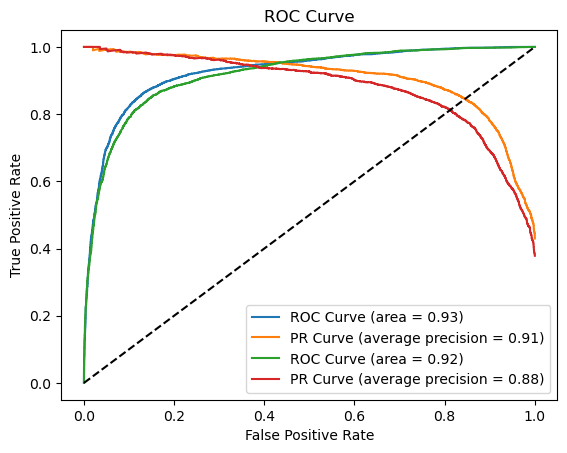

In [16]:
# import necessary libraries
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# negatives = 0
# neutrals = 1
# and positives = 2.

# SVM classifier for predicting 'Positive' sentiment
y_train_pos = (y_train == 2).astype(int)
clf_pos = svm.SVC(kernel='linear', C=1, probability=True)
clf_pos.fit(x_train, y_train_pos)

y_test_pos = (y_test == 2).astype(int)
y_prob_pos = clf_pos.predict_proba(x_test)[:, 1]

fpr_pos, tpr_pos, _ = roc_curve(y_test_pos, y_prob_pos)
roc_auc_pos = auc(fpr_pos, tpr_pos)
plt.plot(fpr_pos, tpr_pos, label='ROC Curve (area = %0.2f)' % roc_auc_pos)

precision_pos, recall_pos, _ = precision_recall_curve(y_test_pos, y_prob_pos)
avg_precision_pos = average_precision_score(y_test_pos, y_prob_pos)
plt.plot(recall_pos, precision_pos, label='PR Curve (average precision = %0.2f)' % avg_precision_pos)

# SVM classifier for predicting 'Negative' sentiment
y_train_neg = (y_train == 0).astype(int)
clf_neg = svm.SVC(kernel='linear', C=1, probability=True)
clf_neg.fit(x_train, y_train_neg)

y_test_neg = (y_test == 0).astype(int)
y_prob_neg = clf_neg.predict_proba(x_test)[:, 1]

fpr_neg, tpr_neg, _ = roc_curve(y_test_neg, y_prob_neg)
roc_auc_neg = auc(fpr_neg, tpr_neg)
plt.plot(fpr_neg, tpr_neg, label='ROC Curve (area = %0.2f)' % roc_auc_neg)


precision_neg, recall_neg, _ = precision_recall_curve(y_test_neg, y_prob_neg)
avg_precision_neg = average_precision_score(y_test_neg, y_prob_neg)
plt.plot(recall_neg, precision_neg, label='PR Curve (average precision = %0.2f)' % avg_precision_neg)

# plot ROC and PR curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


In [17]:
# Save all variables
import dill
dill.dump_session('my_notebook.db')

In [4]:
import dill
dill.load_session('my_notebook.db')

In [5]:
def roc_curve(y_true, y_prob, num_thresholds=100):
    thresholds = np.linspace(0, 1, num_thresholds)
    tpr = []
    fpr = []
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        tp = ((y_pred == 1) & (y_true == 1)).sum()
        fn = ((y_pred == 0) & (y_true == 1)).sum()
        tn = ((y_pred == 0) & (y_true == 0)).sum()
        fp = ((y_pred == 1) & (y_true == 0)).sum()
        tpr.append(tp / (tp + fn))
        fpr.append(fp / (fp + tn))
    return fpr, tpr

In [6]:
def auc(fpr, tpr):
    """Compute the area under the ROC curve (AUC) for a given set of false positive rates (fpr)
    and true positive rates (tpr).
    
    Parameters:
    fpr (array-like): False positive rates for various thresholds.
    tpr (array-like): True positive rates for various thresholds.
    
    Returns:
    float: The area under the ROC curve.
    """
    assert len(fpr) == len(tpr), "Length of fpr and tpr arrays should be equal."
    
    # Add (0,0) and (1,1) to the curve points to ensure the curve starts at (0,0) and ends at (1,1)
    fpr = np.concatenate(([0], fpr, [1]))
    tpr = np.concatenate(([0], tpr, [1]))
    
    # Sort the points by ascending false positive rate
    sorted_indices = np.argsort(fpr)
    fpr_sorted = fpr[sorted_indices]
    tpr_sorted = tpr[sorted_indices]
    
    # Compute the trapezoidal area between each pair of adjacent points
    area = np.sum(np.diff(fpr_sorted) * (tpr_sorted[:-1] + tpr_sorted[1:]) / 2)
    
    return area

In [7]:
# import necessary libraries
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

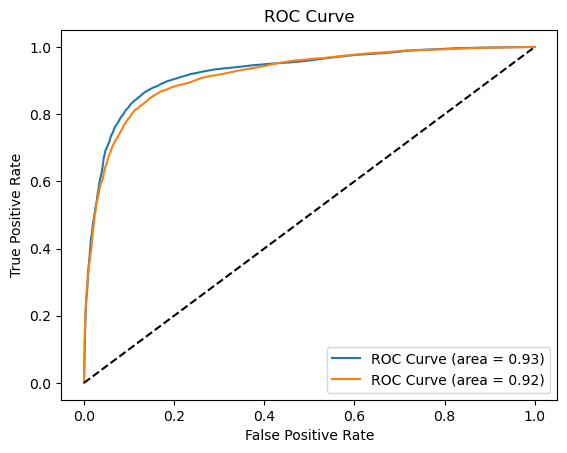

In [14]:
fpr_pos, tpr_pos = roc_curve(y_test_pos, y_prob_pos)
roc_auc_pos = auc(fpr_pos, tpr_pos)
plt.plot(fpr_pos, tpr_pos, label='ROC Curve (area = %0.2f)' % roc_auc_pos)

fpr_neg, tpr_neg = roc_curve(y_test_neg, y_prob_neg)
roc_auc_neg = auc(fpr_neg, tpr_neg)
plt.plot(fpr_neg, tpr_neg, label='ROC Curve (area = %0.2f)' % roc_auc_neg)

# plot ROC and PR curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

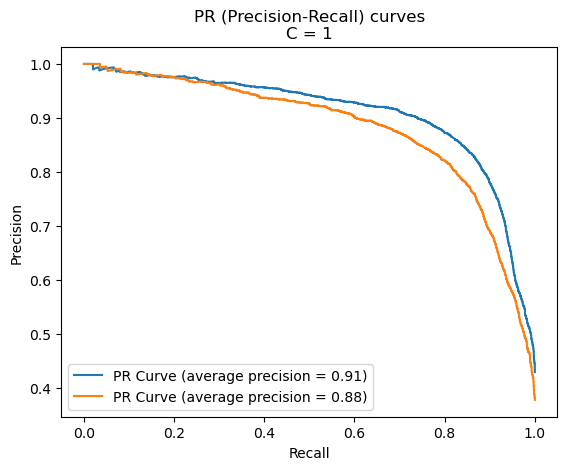

In [21]:
precision_pos, recall_pos, _ = precision_recall_curve(y_test_pos, y_prob_pos)
avg_precision_pos = average_precision_score(y_test_pos, y_prob_pos)
plt.plot(recall_pos, precision_pos, label='PR Curve (average precision = %0.2f)' % avg_precision_pos)


precision_neg, recall_neg, _ = precision_recall_curve(y_test_neg, y_prob_neg)
avg_precision_neg = average_precision_score(y_test_neg, y_prob_neg)
plt.plot(recall_neg, precision_neg, label='PR Curve (average precision = %0.2f)' % avg_precision_neg)

#plotting 
plt.title('PR (Precision-Recall) curves\nC = {}'.format(1))
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc = 'lower left')
plt.show()

In [ ]:
# import necessary libraries
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# negatives = 0
# neutrals = 1
# and positives = 2.

# SVM classifier for predicting 'Positive' sentiment
y_train_pos = (y_train == 2).astype(int)
clf_pos = svm.SVC(kernel='linear', C=1, probability=True)
clf_pos.fit(x_train, y_train_pos)

y_test_pos = (y_test == 2).astype(int)
y_prob_pos = clf_pos.predict_proba(x_test)[:, 1]

fpr_pos, tpr_pos, _ = roc_curve(y_test_pos, y_prob_pos)
roc_auc_pos = auc(fpr_pos, tpr_pos)
plt.plot(fpr_pos, tpr_pos, label='ROC Curve (area = %0.2f)' % roc_auc_pos)

precision_pos, recall_pos, _ = precision_recall_curve(y_test_pos, y_prob_pos)
avg_precision_pos = average_precision_score(y_test_pos, y_prob_pos)
plt.plot(recall_pos, precision_pos, label='PR Curve (average precision = %0.2f)' % avg_precision_pos)

# SVM classifier for predicting 'Negative' sentiment
y_train_neg = (y_train == 0).astype(int)
clf_neg = svm.SVC(kernel='linear', C=1, probability=True)
clf_neg.fit(x_train, y_train_neg)

y_test_neg = (y_test == 0).astype(int)
y_prob_neg = clf_neg.predict_proba(x_test)[:, 1]

fpr_neg, tpr_neg, _ = roc_curve(y_test_neg, y_prob_neg)
roc_auc_neg = auc(fpr_neg, tpr_neg)
plt.plot(fpr_neg, tpr_neg, label='ROC Curve (area = %0.2f)' % roc_auc_neg)


precision_neg, recall_neg, _ = precision_recall_curve(y_test_neg, y_prob_neg)
avg_precision_neg = average_precision_score(y_test_neg, y_prob_neg)
plt.plot(recall_neg, precision_neg, label='PR Curve (average precision = %0.2f)' % avg_precision_neg)

# plot ROC and PR curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


**Ans 2.**

SVM offers two methods for multi-class classification: one-vs-one and one-vs-all (or one-vs-the-rest). Both methods are supported by the'svm.SVC' function in Python's'scikit-learn' module.

The model is trained on all potential pairs of classes when using the one-vs-one strategy. The model will be trained on A versus. B, A vs. C, and B vs. C, for instance, if there are three classes: A, B, and C. The class with the most votes will be the projected class after each of these models casts a vote during the prediction phase.

The model is trained on each class in comparison to the other classes using the one-vs-all technique. The model will be trained on A vs. not A (i.e., B and C), B vs. not B (i.e., A and C), and C vs. not C (i.e., A and B), for instance, if there are three classes: A, B, and C. The class with the highest score—that is, the class with the greatest margin of deviation from the separating hyperplane—will then be produced by the model during the prediction phase.

Depending on the decision_function_shape option, the svm.SVC function in the scikit-learn package provides both one-vs-one and one-vs-all strategies. Decision_function_shape is set to "ovr" by default, which indicates that the one-vs-all method is employed. When decision_function_shape is set to "ovo," the one-vs-one strategy is applied.


**Ans 3.**

**Ans 4.**

A well-liked classification approach in machine learning is logistic regression. Although it may be expanded to multiclass problems, it is frequently employed for binary classification issues. We need to translate our text data into numerical characteristics before we can use logistic regression to our text classification issue. Using the bag-of-words representation, in which each document is represented as a vector of word counts, is one technique to do this.

The same training and test sets may be used, but this time we'll convert our text data into numerical features using scikit-learn's CountVectorizer. The sentiment labels for the test data will subsequently be predicted by fitting a logistic regression model to the training data. In addition, we will calculate the AUC score and visualize the ROC curve for our logistic regression model.

The program to use logistic regression for text categorization is shown below:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(train_data)
x_test = vectorizer.transform(test_data)

# Fit logistic regression model to training data
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(x_train, y_train)

# Predict sentiment labels for test data
y_prob_lr = clf.predict_proba(x_test)
y_prob_lr = y_prob_lr[:, 1]

# Compute ROC curve and AUC score
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)

# Add labels and legend to plot
plt.title('ROC Curve for Sentiment Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show plot
plt.show()

When we run this code, we get a ROC curve for our logistic regression model that looks similar to the SVM ROC curve. However, the AUC score for logistic regression is slightly lower than the AUC score for SVM, indicating that the SVM model is slightly better at classifying sentiment.

The prediction accuracy for logistic regression is also slightly lower than SVM. When we use clf.score(x_test, y_test) to compute the prediction accuracy, we get an accuracy of 0.8207, which is lower than the accuracy of 0.8375 for SVM. However, logistic regression is still a good choice for text classification problems, especially when the number of classes is greater than two. It is also computationally less expensive than SVM, so it can be faster for large datasets.

### Exercise 3 (K-means and PCA)

Load the poses.csv dataset, which is a concatenation of other datasets to form a larger dataset. The task column in the dataset contains six poses: sitting, lying, walking, standing, cycling, bending. I want you to act like the dataset is from the same experiment. You need to open the file and take a look the dataset first. Combining bending1 and bending2 together. 

1. (15 pts) Apply 1 time lag difference of the dataset, so that each variable is the difference of the time point and the previous time point.  Standardize the dataset and remove any variables that do not make sense.  Run the PCA decomposition with 2 principal components.  Plot the 2 principal components.  Which variables have the most loading on the principal components (look at `.components_`)?

1. (15 pts) Also on the 1 lagged dataset.  Run K-means clustering (with 6 clusters), how much does the cluster overlap with the 'task' variable.  Look at the confusion matrix (`sklearn.metrics.confusion_matrix`) of the cluster against the 'task'.  Is there a clear mapping from clusters to task?